In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Assignment2023.sqlite')

# Load data from the table into a DataFrame
query = "SELECT * FROM train;"
df = pd.read_sql_query(query, conn)

In [2]:
# Identify duplicate rows
duplicate_rows = df.duplicated()

# Check for any duplicate rows
if duplicate_rows.any():
    print("Duplicate rows found.")
else:
    print("No duplicate rows.")

No duplicate rows.


In [3]:
# Check for duplicate columns
duplicate_columns = df.T.duplicated()

# Check for any duplicate columns
if duplicate_columns.any():
    print("Duplicate columns found.")
else:
    print("No duplicate columns.")


No duplicate columns.


In [4]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values.sum()) 

4002


In [5]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Impute missing values in all numerical columns with their respective means
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

missing_values = df.isnull().sum()
print(missing_values.sum())

0


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the first categorical column
df['Att11'] = label_encoder.fit_transform(df['Att11'])

# Apply label encoding to the second categorical column
df['Att16'] = label_encoder.fit_transform(df['Att16'])

# Apply label encoding to the third categorical column
df['Att25'] = label_encoder.fit_transform(df['Att25'])


In [7]:
from sklearn.preprocessing import StandardScaler

# Specify the columns needed to scale
columns_to_scale = ['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08', 'Att09', 'Att10', 'Att12', 'Att13', 'Att14', 'Att15', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att26', 'Att27', 'Att28', 'Att29']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

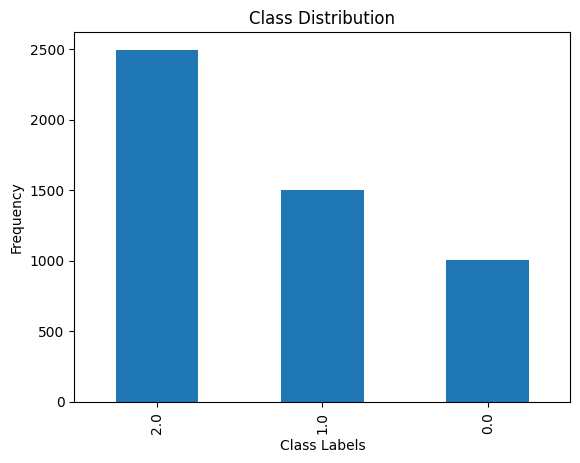

Class Frequencies:
2.0    2496
1.0    1498
0.0    1006
Name: class, dtype: int64

Class Ratios:
2.0    0.4992
1.0    0.2996
0.0    0.2012
Name: class, dtype: float64


In [8]:
import matplotlib.pyplot as plt

# Check for data imbalance in the target variable
target_variable = 'class'
class_frequencies = df[target_variable].value_counts()

# Visualize class distribution
class_frequencies.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

total_samples = len(df)
class_ratios = class_frequencies / total_samples

# Print class frequencies and ratios
print("Class Frequencies:")
print(class_frequencies)
print("\nClass Ratios:")
print(class_ratios)

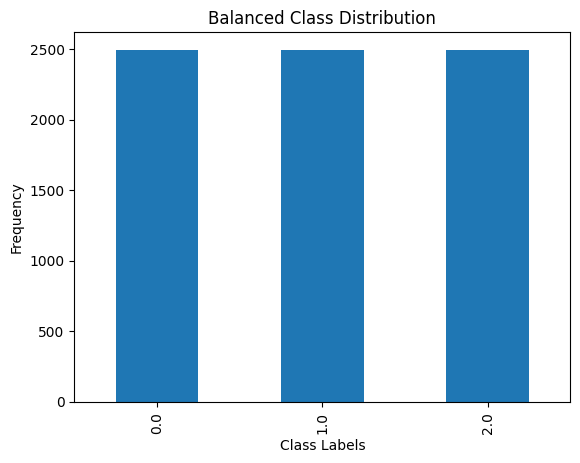

Class Frequencies:
0.0    2496
1.0    2496
2.0    2496
Name: class, dtype: int64

Class Ratios:
0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: class, dtype: float64


In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Random Undersampling (Optional)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Create a balanced DataFrame from the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df[target_variable] = y_resampled

# Check the class distribution
class_frequencies = balanced_df[target_variable].value_counts()
class_ratios = class_frequencies / len(balanced_df)

# Visualize class distribution
class_frequencies.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Balanced Class Distribution')
plt.show()

# Print class frequencies and ratios
print("Class Frequencies:")
print(class_frequencies)
print("\nClass Ratios:")
print(class_ratios)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = balanced_df.drop(columns=['class'])  
y = balanced_df['class']  

# Split the data into a training set and a testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier 
k = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN model on the training data
knn_classifier.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision (macro average)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision (macro average):", precision)

# Calculate recall (macro average)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall (macro average):", recall)

# Calculate F1-score (macro average)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score (macro average):", f1)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.69      0.61       524
         1.0       0.59      0.54      0.56       482
         2.0       0.58      0.47      0.52       492

    accuracy                           0.57      1498
   macro avg       0.57      0.56      0.56      1498
weighted avg       0.57      0.57      0.56      1498

Confusion Matrix:
[[362  87  75]
 [132 259  91]
 [170  93 229]]
Accuracy: 0.5674232309746329
Precision (macro average): 0.5716349264304413
Recall (macro average): 0.5645437491560941
F1-score (macro average): 0.5627356620958253


In [17]:
import joblib

model = knn_classifier 
model_filename = 'knn.pkl'
joblib.dump(model, model_filename)

['knn.pkl']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X = balanced_df.drop(columns=['class'])  
y = balanced_df['class']  

# Split the data into a training set and a testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB(var_smoothing=1e-8, priors=None)

# Train the Naive Bayes model on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision 
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision (weighted average):", precision)

# Calculate recall 
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (weighted average):", recall)

# Calculate F1-score 
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score (weighted average):", f1)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57       524
         1.0       0.64      0.70      0.66       482
         2.0       0.73      0.77      0.75       492

    accuracy                           0.66      1498
   macro avg       0.66      0.67      0.66      1498
weighted avg       0.66      0.66      0.66      1498

Confusion Matrix:
[[280 139 105]
 [111 335  36]
 [ 60  52 380]]
Accuracy: 0.664218958611482
Precision (weighted average): 0.6616469042686196
Recall (weighted average): 0.664218958611482
F1-score (weighted average): 0.6611899253747152


In [19]:
import joblib

model = naive_bayes_classifier 
model_filename = 'naivebayes.pkl'
joblib.dump(model, model_filename)

['naivebayes.pkl']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X = balanced_df.drop(columns=['class'])  
y = balanced_df['class']  

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
decision_tree_classifier.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision 
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision (weighted average):", precision)

# Calculate recall 
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (weighted average):", recall)

# Calculate F1-score 
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score (weighted average):", f1)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       524
         1.0       0.88      0.90      0.89       482
         2.0       0.90      0.80      0.85       492

    accuracy                           0.88      1498
   macro avg       0.88      0.88      0.88      1498
weighted avg       0.88      0.88      0.88      1498

Confusion Matrix:
[[489  10  25]
 [ 25 436  21]
 [ 47  49 396]]
Accuracy: 0.8818424566088118
Precision (weighted average): 0.8825731229249646
Recall (weighted average): 0.8818424566088118
F1-score (weighted average): 0.8809894088611814


In [13]:
import joblib

model = decision_tree_classifier 
model_filename = 'decisiontree.pkl'
joblib.dump(model, model_filename)

['decisiontree.pkl']